In [ ]:
'''import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)'''

In [1]:
import math
import json
#import cv
import gc
import numpy as np
import numpy.ma as ma
import keras
from keras import backend as K
from keras.utils import np_utils
from keras.engine import Layer

from keras.layers import Input, Dense, Convolution3D, MaxPooling3D, Reshape, Flatten, BatchNormalization, Lambda, Dropout, Activation
from keras.layers.merge import concatenate
from keras.models import Model, Sequential, model_from_json
from keras.utils import multi_gpu_model
from keras.optimizers import SGD, RMSprop, Adam
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing import image
from keras.callbacks import Callback, ModelCheckpoint, EarlyStopping

from keras.models import load_model

In [2]:
#import vis.utils as utils
#from vis.visualization import visualize_saliency
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing as pre
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import tensorflow as tf
import numpy as np
import os, random, gc, pickle
os.environ["CUDA_VISIBLE_DEVICES"]="2"
import nibabel as nib
import pandas as pd
from sklearn.model_selection import train_test_split
import build_multiBranch as bm

In [3]:
'''import datetime
print(datetime.datetime.utcnow().strftime('%Y%m%d_%H-%M-%S'))

import torch
#print(torch._C._cudnn_version(), 'cudnn')
#print(torch._C._cuda_getDriverVersion(), 'cuda driver')
print(torch._C._cuda_getCompiledVersion(), 'cuda compiled version')
print(torch._C._nccl_version(), 'nccl')
for i in range(torch.cuda.device_count()):
    print('device %s:'%i, torch.cuda.get_device_properties(i))

    
import subprocess
print('\nnvcc --version')
print(subprocess.check_output('nvcc --version'.split(' ')).decode())
print('\nnvidia-smi')
print(subprocess.check_output(['nvidia-smi']).decode())
print('\napt list nvidia-driver*')
print(subprocess.check_output('apt list nvidia-driver*'.split(' ')).decode())
print(subprocess.check_output('apt list *cudnn*'.split(' ')).decode())
print(subprocess.check_output('apt list *cuda*'.split(' ')).decode())'''

"import datetime\nprint(datetime.datetime.utcnow().strftime('%Y%m%d_%H-%M-%S'))\n\nimport torch\n#print(torch._C._cudnn_version(), 'cudnn')\n#print(torch._C._cuda_getDriverVersion(), 'cuda driver')\nprint(torch._C._cuda_getCompiledVersion(), 'cuda compiled version')\nprint(torch._C._nccl_version(), 'nccl')\nfor i in range(torch.cuda.device_count()):\n    print('device %s:'%i, torch.cuda.get_device_properties(i))\n\n    \nimport subprocess\nprint('\nnvcc --version')\nprint(subprocess.check_output('nvcc --version'.split(' ')).decode())\nprint('\nnvidia-smi')\nprint(subprocess.check_output(['nvidia-smi']).decode())\nprint('\napt list nvidia-driver*')\nprint(subprocess.check_output('apt list nvidia-driver*'.split(' ')).decode())\nprint(subprocess.check_output('apt list *cudnn*'.split(' ')).decode())\nprint(subprocess.check_output('apt list *cuda*'.split(' ')).decode())"

In [4]:
'''CUDA_VISIBLE_DEVICES=3'''

'CUDA_VISIBLE_DEVICES=3'

In [5]:
'''import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="3"  # specify which GPU(s) to be used'''

'import os\nos.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"\nos.environ["CUDA_VISIBLE_DEVICES"]="3"  # specify which GPU(s) to be used'

In [6]:
#import vis.utils as utils
#from vis.visualization import visualize_saliency
#from sklearn.preprocessing import MinMaxScaler
#import sklearn.preprocessing as pre
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
#import tensorflow as tf
#import numpy as np
#import nibabel as nib
#import pandas as pd
#from sklearn.model_selection import train_test_split
#import data_processing as process
#import build_multiBranch as bm
#import Fit_model as fitter
#import Evaluate_model as Evalu
#import generate_patches3D as generator

In [7]:
'''from numba import jit, cuda'''


'from numba import jit, cuda'

In [8]:
'''import tensorflow as tf
tf.config.list_physical_devices('GPU')
tf.test.is_built_with_cuda()'''

"import tensorflow as tf\ntf.config.list_physical_devices('GPU')\ntf.test.is_built_with_cuda()"

In [9]:
'''from tensorflow.python.client import device_lib'''


'from tensorflow.python.client import device_lib'

In [10]:
'''device_lib.list_local_devices'''

'device_lib.list_local_devices'

In [3]:
metadata = pd.read_csv('ADNI1_Screening_1.5T.csv')
total_data = (metadata.Group !=0).values.astype('bool')

dirName = '/home/dipnilc/Dipnil/ADNI_BET/ADNI1'

#listOFFiles = process.getListOfFiles(dirName)
#for elem in listOFFiles:
    #print(elem)

#print("***************")

listOfDirs = list()
for (dirpath, dirnames, filenames) in os.walk(dirName):
    listOfDirs += [os.path.join(dir) for dir in dirnames]


In [4]:
listOfDirs

['123_S_0088',
 '027_S_0256',
 '073_S_0746',
 '016_S_0354',
 '137_S_0994',
 '041_S_0262',
 '067_S_1185',
 '005_S_1224',
 '023_S_0083',
 '002_S_0685',
 '022_S_1351',
 '073_S_0312',
 '018_S_0335',
 '109_S_1343',
 '098_S_0149',
 '036_S_0976',
 '073_S_0909',
 '020_S_1288',
 '128_S_1408',
 '041_S_1002',
 '141_S_0851',
 '052_S_1054',
 '068_S_0473',
 '014_S_0557',
 '010_S_0067',
 '023_S_0388',
 '005_S_0324',
 '016_S_0991',
 '012_S_1033',
 '023_S_0613',
 '137_S_0800',
 '141_S_1152',
 '128_S_0188',
 '007_S_0344',
 '141_S_0852',
 '109_S_1157',
 '006_S_0498',
 '128_S_0138',
 '016_S_1138',
 '127_S_0925',
 '033_S_0511',
 '002_S_1018',
 '133_S_1055',
 '098_S_0884',
 '130_S_0289',
 '130_S_1290',
 '013_S_0325',
 '128_S_1406',
 '041_S_1368',
 '013_S_0502',
 '022_S_0961',
 '114_S_0979',
 '136_S_0579',
 '137_S_1426',
 '051_S_1040',
 '114_S_1103',
 '027_S_0408',
 '130_S_1200',
 '941_S_1194',
 '057_S_1373',
 '116_S_0648',
 '067_S_1253',
 '018_S_0682',
 '011_S_0168',
 '099_S_0958',
 '127_S_0260',
 '016_S_07

In [5]:
listOfFiles = list()
for (dirpath, dirnames, filenames) in os.walk(dirName):
    listOfFiles += [os.path.join(dirpath,dir,dir)+'_pve_0.nii.gz' for dir in dirnames]


In [6]:
#listOfFiles

In [15]:
#metadata

In [7]:
# make sure each subject appear at most once in the training data and so does in the test data.
subjects_count = 0
subjects_dict = []

In [8]:
# make sure each subject appear at most once in the training data and so does in the test data.
subjects_count = 0
subjects_dict = []
for elem in listOfFiles:
    #im = 'ADNI_002_S_0413_MR_MPR____N3__Scaled_Br_20070216232854688_S14782_I40657.nii'
    #img = nib.load(elem).get_data()
    #img = np.asarray(img)
    split_names = elem.split('/')
    subject_name = split_names[6]
    if subjects_count==0:
        subjects_count +=1
        subjects_dict.append(subject_name)
    else:
        if subject_name in subjects_dict:
            subjects_count += 0
            #subjects_dict.append(subject_name)
	    #continue
        else:
            subjects_count += 1
            subjects_dict.append(subject_name)
    if subjects_count>1072:
         break
np.shape(subjects_dict)


(817,)

In [9]:
subjects_dict1=subjects_dict

In [10]:
np.shape(subjects_dict1)


(817,)

In [11]:
data = np.zeros((int(subjects_count), 155, 155, 95))
labels = np.zeros((int(subjects_count), 1))
labels_C = np.zeros((int(subjects_count), 1))
#scaler = MinMaxScaler()

In [12]:
idx=pd.DataFrame(np.arange(0,1073))
idx.columns=['Index']
idx

,Index
0,0
1,1
2,2
3,3
4,4
...,...
1068,1068
1069,1069
1070,1070
1071,1071


In [13]:
metadata1=pd.concat([idx,metadata],axis=1)
metadata1[total_data]

,Index,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,0,63897,941_S_1363,MCI,F,70,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/12/2007,NiFTI,1/18/2019
1,1,97327,941_S_1311,MCI,M,69,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,3/02/2007,NiFTI,1/18/2019
2,2,63888,941_S_1295,MCI,M,77,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/09/2007,NiFTI,1/18/2019
3,3,63879,941_S_1203,CN,M,83,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,1/29/2007,NiFTI,1/18/2019
4,4,63874,941_S_1202,CN,M,78,1,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,1/30/2007,NiFTI,1/18/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,1068,40674,002_S_0559,CN,M,79,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,5/23/2006,NiFTI,1/18/2019
1069,1069,45117,002_S_0413,CN,F,76,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,5/02/2006,NiFTI,1/18/2019
1070,1070,118673,002_S_0413,CN,F,76,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled_2,Processed,5/02/2006,NiFTI,1/18/2019
1071,1071,45108,002_S_0295,CN,M,85,1,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,4/18/2006,NiFTI,1/18/2019


In [14]:
img = nib.load(elem).get_fdata()
img = np.asarray(img)
np.shape(img)

(256, 256, 166)

In [15]:
ind_img = 0
for elem in listOfFiles:
    split_names = elem.split('/')
    subject_name = split_names[6]
    if subject_name in subjects_dict:
        img = nib.load(elem).get_fdata()
        img = np.asarray(img)
        img = img[35:190, 35:190, 40:135]
        scaler1 = MinMaxScaler()
        for jj in range(95):
            img[:, :, jj] = scaler1.fit_transform(img[:, :, jj])
        scaler2 = MinMaxScaler()
        for tt in range(155):
            img[tt, :, :] = scaler2.fit_transform(img[tt, :, :])
        scaler3 = MinMaxScaler()
        for kk in range(155):
            img[:, kk, :] = scaler3.fit_transform(img[:, kk, :])

        data[ind_img, :, :, :] = img
        indexM=metadata1.loc[metadata1['Subject']==(subject_name)]
    #indexM = int(indexM[0])
        group=metadata1.Group[metadata1['Subject']==(subject_name)] 
        #print(group[0])
        group=pd.DataFrame(group)       
        group = group.iloc[0]['Group']
        if group=='AD':
            label = 2
            label_c = 0
        if group=='CN':
            label = 0
            label_c = 1
        if group=='MCI':
            label = 1
            label_c = 0
        labels[ind_img] = label
        labels_C[ind_img] = label_c
        ind_img += 1
        sub_ind = subjects_dict.index(subject_name)
        subjects_dict.pop(sub_ind)


In [16]:
listOfFiles = list()
for (dirpath, dirnames, filenames) in os.walk(dirName):
    listOfFiles += [os.path.join(dirpath,dir,dir)+'_pve_0.nii.gz' for dir in dirnames]
# make sure each subject appear at most once in the training data and so does in the test data.
subjects_count = 0
subjects_dict = []
for elem in listOfFiles:
    #im = 'ADNI_002_S_0413_MR_MPR____N3__Scaled_Br_20070216232854688_S14782_I40657.nii'
    #img = nib.load(elem).get_data()
    #img = np.asarray(img)
    split_names = elem.split('/')
    subject_name = split_names[6]
    if subjects_count==0:
        subjects_count +=1
        subjects_dict.append(subject_name)
    else:
        if subject_name in subjects_dict:
            subjects_count += 0
            #subjects_dict.append(subject_name)
	    #continue
        else:
            subjects_count += 1
            subjects_dict.append(subject_name)
    if subjects_count>1072:
         break
np.shape(subjects_dict)


(817,)

In [17]:
#data = scaler.fit(data)
data = np.reshape(data, (data.shape[0], data.shape[1], data.shape[2], data.shape[3], 1))
print(data.shape)


(817, 155, 155, 95, 1)


In [18]:
X_train1, X_test, Y_train1, Y_test, id_train1,id_test = train_test_split(data, labels,subjects_dict, test_size=0.1, train_size=0.9, random_state=7)

#X_train, X_test, Y_train_C, Y_test_C = train_test_split(data, labels_C, test_size=0.1, train_size=0.9, random_state=7)
#np.save("Labels2_tr", Y_train)
#np.save("Labels2_ts", Y_test)
#np.save("Labels2_C_tr", Y_train_C)
#np.save("Labels2_C_ts", Y_test_C)
#Y_train = np_utils.to_categorical(Y_train, 3)
Y_test = np_utils.to_categorical(Y_test, 3)
#Y_train_C = np_utils.to_categorical(Y_train_C, 2)
#Y_test_C = np_utils.to_categorical(Y_test_C, 2)
#np.save("wholeImg_tr", X_train)
#np.save("wholeImg_ts", X_test)
#num_tr = X_train.shape[0]
#num_ts = X_test.shape[0]
print("Saved the data")


Saved the data


In [19]:
X_train, X_validation, Y_train, Y_validation, id_train,id_validation = train_test_split(X_train1, Y_train1,id_train1, test_size=1/9, train_size=8/9, random_state=7)
Y_train = np_utils.to_categorical(Y_train, 3)
Y_validation = np_utils.to_categorical(Y_validation, 3)

In [20]:
print(X_train.shape)
print(X_test.shape)

(653, 155, 155, 95, 1)
(82, 155, 155, 95, 1)


In [21]:
num_branches = 27
batch_size = 4
nb_epochs = 10
early_stopping_patience = 20

In [22]:
channels = 155
img_size_x = 155
img_size_y = 95
batch_size = 4
nb_classes = 3
nb_epochs = 25
learning_rate = 0.003
early_stopping_patience = 10
class_names = ["AD","CN", "MCI"]

In [32]:
ids=pd.concat([pd.DataFrame(id_train),pd.DataFrame(id_validation),pd.DataFrame(id_test)],axis=0)
pd.DataFrame(ids).to_csv("/home/dipnilc/Dipnil/Codes/features_ID_GM_917_TrVaTs.csv", header=None, sep=',',index=None)

In [23]:
from tensorflow.keras import layers
def get_model(width=155, height=155, depth=95):
    """Build a 3D convolutional neural network model."""

    inputs = keras.Input((155, 155, 95, 1))

    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(inputs)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=128, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.Conv3D(filters=256, kernel_size=3, activation="relu")(x)
    x = layers.MaxPool3D(pool_size=2)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling3D()(x)
    x = layers.Dense(units=512, activation="relu")(x)
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(units=100, activation="relu")(x)
    x = layers.Dropout(0.3)(x)

    outputs = layers.Dense(units=nb_classes, activation="softmax")(x)

    # Define the model.
    model = keras.Model(inputs, outputs, name="3D-CNN")
    return model


# Build model.
model = get_model(width=155, height=155, depth=95)
model.summary()


Model: "3D-CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 155, 155, 95, 1)] 0         
_________________________________________________________________
conv3d_108 (Conv3D)          (None, 153, 153, 93, 64)  1792      
_________________________________________________________________
max_pooling3d_54 (MaxPooling (None, 76, 76, 46, 64)    0         
_________________________________________________________________
batch_normalization_108 (Bat (None, 76, 76, 46, 64)    256       
_________________________________________________________________
conv3d_109 (Conv3D)          (None, 74, 74, 44, 64)    110656    
_________________________________________________________________
max_pooling3d_55 (MaxPooling (None, 37, 37, 22, 64)    0         
_________________________________________________________________
batch_normalization_109 (Bat (None, 37, 37, 22, 64)    256  

In [24]:
# Compile model.
initial_learning_rate = 0.0001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=100000, decay_rate=0.96, staircase=True
)
model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=lr_schedule),
    metrics=["acc",tf.keras.metrics.AUC()],
)
inputs = keras.Input((155, 155, 95, 1))




In [38]:
# Define callbacks.
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "3d_image_GM_classification.h5", save_best_only=True
)
early_stopping_cb = keras.callbacks.EarlyStopping(monitor="val_acc", patience=15)

# Train the model, doing validation at the end of each epoch
epochs = 100

In [43]:
m = model.fit(X_train, Y_train,batch_size=4,epochs=1,verbose=1, shuffle=True, validation_data=(X_validation, Y_validation),callbacks=[checkpoint_cb, early_stopping_cb])


164/164 [==============================] - 849s 5s/step - loss: 0.6240 - acc: 0.4334 - auc_1: 0.6066 - val_loss: 0.8323 - val_acc: 0.5488 - val_auc_1: 0.6865


In [35]:
#Y_predict

In [40]:
model.predict(X_test)

array([[0.10797741, 0.6272079 , 0.2648147 ],
       [0.10276509, 0.6203982 , 0.2768367 ],
       [0.1042094 , 0.62251633, 0.27327424],
       [0.10530299, 0.6237374 , 0.27095962],
       [0.10780242, 0.629061  , 0.2631366 ],
       [0.10856595, 0.6313884 , 0.26004562],
       [0.11088797, 0.632512  , 0.25660005],
       [0.10612192, 0.627465  , 0.26641306],
       [0.10633817, 0.6245721 , 0.2690897 ],
       [0.10408014, 0.62189937, 0.2740205 ],
       [0.10975557, 0.6303954 , 0.25984904],
       [0.10527136, 0.6223993 , 0.27232933],
       [0.0973866 , 0.612051  , 0.29056242],
       [0.10546923, 0.6244746 , 0.27005628],
       [0.10348749, 0.62382406, 0.27268848],
       [0.12218112, 0.64316213, 0.23465675],
       [0.09862775, 0.61514467, 0.28622758],
       [0.11198839, 0.62878865, 0.25922295],
       [0.09911691, 0.61526674, 0.2856164 ],
       [0.10077436, 0.6179123 , 0.28131336],
       [0.11420289, 0.6331205 , 0.2526766 ],
       [0.10761593, 0.6290854 , 0.26329866],
       [0.

In [41]:
#Y_test

In [42]:
branch_input = Input(shape= (155,155,95,1))
model_temp = bm.build_separate_model(branch_input)
val_data = X_test
val_labels = Y_test
#val_labels_C = Y_test_C
#model_temp = multi_gpu_model(model_temp, gpus=2)
opt = keras.optimizers.Adam(lr=2e-4)
model_temp.compile(optimizer=opt, loss='categorical_crossentropy', metrics=[tf.keras.metrics.AUC(),'accuracy'])

v = 2207
model_weights_file = 'img_classifierW_weights_GM_%s.h5' %v
epoch_weights_file = 'img_classifierW_weights_GM_%s_{epoch:02d}.hdf5' %v
model_file = 'img_classifierW_model_GM%s.h5' %v
history_file = 'img_classifierW_history_GM_%s.json' %v


checkpoint = ModelCheckpoint(epoch_weights_file, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=early_stopping_patience, verbose=1, mode='auto')
callbacks_list = [checkpoint, early_stopping]
#datagen = ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False,samplewise_std_normalization=False,zca_whitening=False,rotation_range=15,zoom_range=0.1,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=False,vertical_flip=False)

model_temp.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 155, 155, 95, 1)] 0         
_________________________________________________________________
conv1 (Conv3D)               (None, 151, 151, 91, 32)  4032      
_________________________________________________________________
act1 (Activation)            (None, 151, 151, 91, 32)  0         
_________________________________________________________________
pool1 (MaxPooling3D)         (None, 75, 75, 45, 32)    0         
_________________________________________________________________
class_conv (Conv3D)          (None, 75, 75, 45, 3)     99        
_________________________________________________________________
class_score (Activation)     (None, 75, 75, 45, 3)     0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 759375)            0     

In [43]:
model.load_weights("3d_image_GM_classification.h5")


In [44]:
features_test=model.predict(X_test)


In [45]:
features_test

array([[0.3135446 , 0.48260033, 0.20385513],
       [0.09735964, 0.74092096, 0.16171935],
       [0.26510975, 0.5702893 , 0.16460097],
       [0.16024402, 0.69566196, 0.14409405],
       [0.06286152, 0.81575   , 0.12138845],
       [0.06915223, 0.64327717, 0.28757057],
       [0.3204738 , 0.5140704 , 0.16545586],
       [0.05898845, 0.6862453 , 0.25476626],
       [0.3627639 , 0.4892984 , 0.14793776],
       [0.07947076, 0.49687186, 0.4236573 ],
       [0.22751333, 0.5600592 , 0.21242748],
       [0.09957021, 0.51678145, 0.38364837],
       [0.29326108, 0.6549489 , 0.05178995],
       [0.0798648 , 0.5989184 , 0.32121682],
       [0.20317046, 0.6112332 , 0.18559638],
       [0.01086935, 0.45530254, 0.533828  ],
       [0.20265634, 0.65257686, 0.14476681],
       [0.37942162, 0.47323805, 0.14734033],
       [0.18708092, 0.64446324, 0.16845588],
       [0.6146676 , 0.33658728, 0.04874525],
       [0.22530362, 0.50662786, 0.2680685 ],
       [0.41861063, 0.4477514 , 0.13363798],
       [0.

In [46]:
Y_predicted=np_utils.to_categorical(np.argmax(features_test, axis=1),3)

In [47]:
np.sum(Y_predicted,axis=0)

array([ 2., 78.,  2.], dtype=float32)

In [48]:
np.sum(Y_test,axis=0)

array([19., 48., 15.], dtype=float32)

In [49]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test,Y_predicted)

0.47584498144199633

In [128]:
(np.argmax(Y_test,axis=1)-np.argmax(features_test, axis=1))**2

0.4634146341463415

In [116]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(np.argmax(Y_validation, axis=1),np.argmax(features_test, axis=1), pos_label=2)
metrics.auc(fpr, tpr)
#metrics.auc(np.argmax(Y_test, axis=1),np.argmax(features_test, axis=1))

0.5746268656716418

In [62]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
X, y = load_breast_cancer(return_X_y=True)
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X, y)

In [101]:
y[99]

array([0, 1, 0, 1, 1])

In [71]:
from sklearn.multioutput import MultiOutputClassifier
X, y = make_multilabel_classification(random_state=0)
clf = MultiOutputClassifier(clf).fit(X, y)
# get a list of n_output containing probability arrays of shape
# (n_samples, n_classes)
y_pred = clf.predict_proba(X)
# extract the positive columns for each output
y_pred = np.transpose([pred[:, 1] for pred in y_pred])

#roc_auc_score(y, y_pred, average=None)
#array([0.82..., 0.86..., 0.94..., 0.85... , 0.94...])
#from sklearn.linear_model import RidgeClassifierCV
#clf = RidgeClassifierCV().fit(X, y)
#roc_auc_score(y, clf.decision_function(X), average=None)
#array([0.81..., 0.84... , 0.93..., 0.87..., 0.94...])

ValueError: y must have at least two dimensions for multi-output regression but has only one.

In [53]:
from sklearn.datasets import make_multilabel_classification
X, y = make_multilabel_classification(random_state=0)

(735, 100)
(82, 100)
Explained variation per principal component: [0.2835941  0.1404652  0.12456509 0.05682736 0.03853712 0.02395179
 0.01914842 0.01801331 0.01606208 0.01400473]


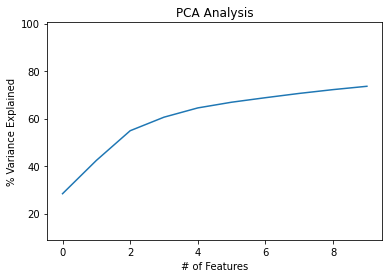

In [44]:
model_temp.load_weights("img_classifierW_weights_77_12.hdf5")
neuron_model=Model(inputs=branch_input,outputs=model_temp.layers[-4].output)
features = neuron_model.predict(X_train)
features_test=neuron_model.predict(X_test)
print(features.shape)
print(features_test.shape)
feature_extrc=np.concatenate((features,features_test))
feature_extrc.shape
feature_extrc=pd.concat([pd.DataFrame(feature_extrc),pd.DataFrame(labels)],axis=1)
pd.DataFrame(feature_extrc).to_csv("/home/dipnilc/Dipnil/features_WI_GM.csv", header=None, sep=',',index=None)
df_ADNI = feature_extrc
#df_ADNI['label'] = labels
df_ADNI.head()
from sklearn.decomposition import PCA
pca_ADNI = PCA(n_components=10)
#principalComponents_ADNI = pca_ADNI.fit_transform(df_ADNI[feat_cols].values)
principalComponents_ADNI = pca_ADNI.fit_transform(df_ADNI.iloc[:,:-1])
np.shape(principalComponents_ADNI)
pd.DataFrame(principalComponents_ADNI).to_csv("/home/dipnilc/Dipnil/features_WI_GM_PCA.csv", header=None, sep=',',index=None)
print('Explained variation per principal component: {}'.format(pca_ADNI.explained_variance_ratio_))
variance = pca_ADNI.explained_variance_ratio_ #calculate variance ratios

var=np.cumsum(np.round(pca_ADNI.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features
import matplotlib.pyplot as plt
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(9,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

In [1]:
m = model_temp.fit(X_train, Y_train,batch_size=4,epochs=80,verbose=1, shuffle=True, validation_data=(val_data, val_labels))


NameError: name 'model_temp' is not defined

In [42]:

def save_model_and_weights(model):
        model.save(model_file)
        model.save_weights(model_weights_file)

def save_model_history(m):
    with open(history_file, 'wb') as history_json_file:
        json.dump(m.history, history_json_file)

    return 'Saved model history to disk'
print(save_model_and_weights(model_temp))
#print(save_model_history(m))
#del model_temp
#del m
gc.collect()


# In[ ]:


from keras.utils.vis_utils import plot_model
plot_model(model_temp, to_file='GM_model_plot.png', show_shapes=True, show_layer_names=True)

NameError: name 'model_file' is not defined

In [ ]:
"""from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
transfer_model=Sequential()
transfer_model.add(VGG16(include_top=False,weights='imagenet',pooling='avg'))
transfer_model.add(Dense(3,activation='softmax'))
transfer_model.layers[0].trainable=False
transfer_model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=[tf.keras.metrics.AUC(),'accuracy'])
transfer_model.summary()"""